In [1]:
import numpy as np

import matplotlib.pyplot as plt

from scipy import stats

In [2]:
exog = np.array([[0.2, 0.65], [0.8, 0.35]])
lindex = stats.norm.ppf(exog)

In [36]:
T = 1000

rho = 0
epsilons = np.linspace(-3, 3, T)
endog = []
for i in range(len(epsilons)):
    eps = epsilons[i]
    probs = stats.norm.cdf(lindex - np.array([[1], [-1]]) * rho * eps / np.sqrt(1 - rho**2))
    endog.append(probs)

endog = np.array(endog)

In [37]:
plt.rc('font', size=9)

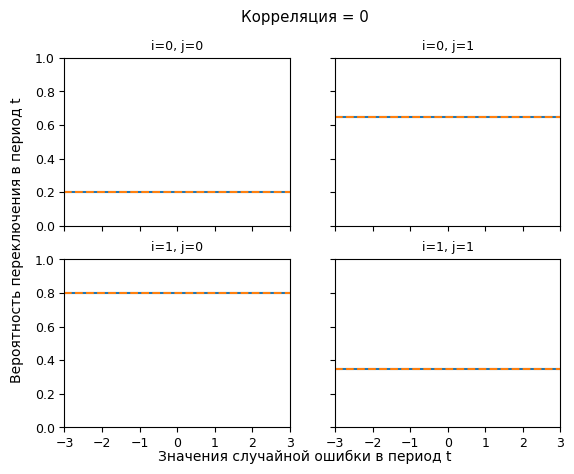

In [38]:
fig, ax = plt.subplots(2, 2, sharex='all', sharey='all')
plt.xlim((-3, 3))
plt.ylim((0, 1))
fig.suptitle(f'Корреляция = {rho}')
ax[0, 0].plot(epsilons, endog[:, 0, 0])
ax[0, 0].set_title("i=0, j=0", fontsize=9)

ax[0, 1].plot(epsilons, endog[:, 0, 1])
ax[0, 1].set_title("i=0, j=1", fontsize=9)

ax[1, 0].plot(epsilons, endog[:, 1, 0])
ax[1, 0].set_title("i=1, j=0", fontsize=9)

ax[1, 1].plot(epsilons, endog[:, 1, 1])
ax[1, 1].set_title("i=1, j=1", fontsize=9)

ax[0, 0].plot(epsilons, [exog[0, 0]] * T, ls='--')
ax[0, 1].plot(epsilons, [exog[0, 1]] * T, ls='--')
ax[1, 0].plot(epsilons, [exog[1, 0]] * T, ls='--')
ax[1, 1].plot(epsilons, [exog[1, 1]] * T, ls='--')

fig.text(0.5, 0.04, 'Значения случайной ошибки в период t', ha='center', fontdict={"fontsize": 10})
fig.text(0.04, 0.5, 'Вероятность переключения в период t', va='center', rotation='vertical', fontdict={"fontsize": 10});